## M3C 2018 Lab 3 version 2 solution

In [4]:
#Edited to fix a few problems in original version
#set up the notebook
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Task 1: Constrained optimization

In lecture 6, we applied unconstrained-optimization methods to find the minimum of a 2-D Gaussian, $$F(x,y) = exp[-\alpha (x-x_0)^2 -\beta (y-y_0)^2] \\ $$ In this exercise, you will solve this optimization problem subject to the *equality* constraint, $y = sin(x)$

1) First, we introduce python functions for the cost function, and its gradient (identical to gauss2d.py):

In [5]:
#objective function
def gauss2d(xf,x0,y0,a,b):
    """Compute 2d gaussian function, exp(-a*(x-x0)^2-b*(y-y0)^2)
    x = xf[0], y = xf[1]
    """
    x = xf[0]
    y = xf[1]

    return -np.exp(-a*(x-x0)**2 - b*(y-y0)**2)


#gradient of objective function
def gauss2d_grad(xf,x0,y0,a,b):
    """Compute gradietn of 2d gaussian function
    defined in gauss2d. Returns two-element tuple
    containing (df/dx,df/dy)
    """

    #compute function
    f = gauss2d(xf,x0,y0,a,b)

    x = xf[0]
    y = xf[1]

    return np.array([-2.0*a*(x-x0)*f,-2.0*b*(y-y0)*f])

2) The equality constraint has to be specified in a function, complete the function below to return $y-sin(x)$.

In [6]:
def econstraint(U):
    """U is a two-element tuple
       containing x and y"""
    return U[1]-np.sin(U[0])
    #add return statement
    

3) The code below sets up the parameters of the problem, and defines the dictionary, *cons*, which should be provided as input to *minimize*. Note that inequality constraints can be set up in a similar manner with 'type':'ineq'

In [10]:
from scipy.optimize import minimize
xguess = (2,np.sin(2))
parameters = (1.0,3.0,1.0,1.0) #x0,y0,a,b
cons = ({'type':'eq','fun':econstraint}) #equality constraint

4) Uncomment the code below and complete the call to *minimize* so that it uses *cons* and the *SLSQP* method

In [11]:
result = minimize(gauss2d,xguess,args=parameters, method='SLSQP',constraints=cons)
x,y=result.x[0],result.x[1] #extract location of optimum from result

The code below will display the Gaussian, the constraint, and the solution

In [12]:
#display objective
def display_gauss2d(args):
    """display objective functions and curves indicating 
    equality (green) constraints"""

    from matplotlib import colors

    x0,y0,a,b=args
    
    x = np.linspace(-5+x0,5+x0,101)
    y = np.linspace(-5+y0,5+y0,101)
    
    xg,yg=np.meshgrid(x,y)
    xf = (xg,yg)
        
    f = gauss2d(xf,x0,y0,a,b)
    
    plt.figure()
    V = np.logspace(-6,0,20)
    plt.contour(xg,yg,-f,V,norm=colors.LogNorm())
    plt.plot(x,np.sin(x),'g--')
    plt.axis([x0-5,x0+5,y0-5,y0+5])
    plt.legend(('equality constraint',''),loc='best')
    plt.xlabel('x')
    plt.ylabel('y')

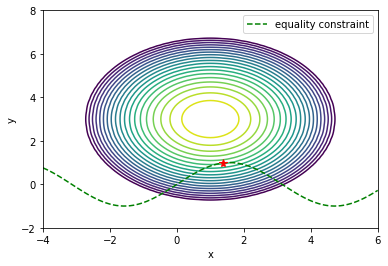

In [13]:
display_gauss2d(parameters)
plt.plot(x,y,'r*',markersize=8)

### Task 2: Simple neural network example

1) The script below imports a dataset of images of handwritten digits stored in *X* with labels stored in *y*. You should first run the code (two versions are provided), and then work through the questions that follow.

In [ ]:
#Should work for newer Python and sklearn installations (otherwise see below)
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

print(__doc__)

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255.; #X=X[:10000];y=y[:10000]

# rescale the data, use the traditional train/test split
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))



In [23]:
#For older Python/sklearn installations
print(__doc__)

import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
from sklearn.neural_network import MLPClassifier

mnist = fetch_mldata("MNIST original")
# rescale the data, use the traditional train/test split
X, y = mnist.data / 255., mnist.target; #X=X[:10000];y=y[:10000]
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Automatically created module for IPython interactive environment
Iteration 1, loss = 0.32212731
Iteration 2, loss = 0.15738787
Iteration 3, loss = 0.11647274
Iteration 4, loss = 0.09631113
Iteration 5, loss = 0.08074513
Iteration 6, loss = 0.07163224
Iteration 7, loss = 0.06351392
Iteration 8, loss = 0.05694146
Iteration 9, loss = 0.05213487
Iteration 10, loss = 0.04708320


/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score: 0.985733
Test set score: 0.971000


2) $X$ contains the input images and $y$ the labels for the images. What are the shapes of $X$ and $y$? What do the dimensions of X correspond to?

In [17]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


3) Each row of X contains pixel values for a 28 x 28 image. Use np.reshape to
create a 28 x 28 matrix from the 20001st row of X. Then use plt.imshow() to display this matrix

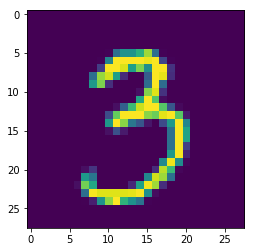

In [18]:
Ximage = X[20000,:].reshape(28,28)
plt.imshow(Ximage)

4) Does the image match the corresponding value of y

In [19]:
y[20000]

3.0

5) The *mlp.predict* method is used to obtain predictions from the NN after its fitting parameters have been set. Use the *predict* method to predict the number displayed in the last row of *X_test*. Is the prediction correct?

In [36]:
X_test[-1,:].reshape((784,1))
mlp.predict(X_test[-1,:].reshape((1,784)))

array([ 9.])

In [37]:
y[-1]

9.0